In [74]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
# Data source - https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

df = pd.read_csv('/content/drive/MyDrive/Internship/WineQT.csv')

In [76]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [77]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [78]:
df.shape

(1143, 13)

In [79]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [80]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [81]:
  df.drop('Id', axis=1, inplace=True)

In [82]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


<Axes: xlabel='quality', ylabel='count'>

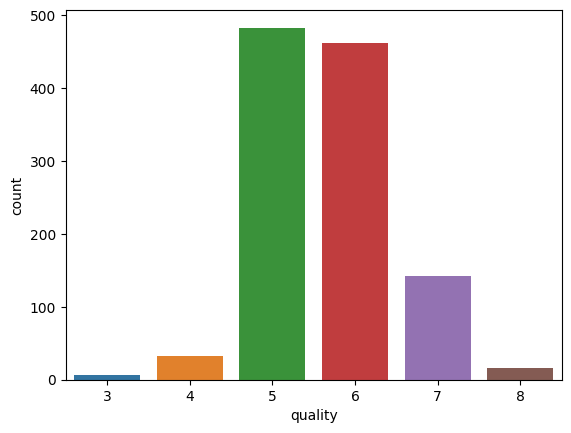

In [83]:
sns.countplot(x=df['quality'])

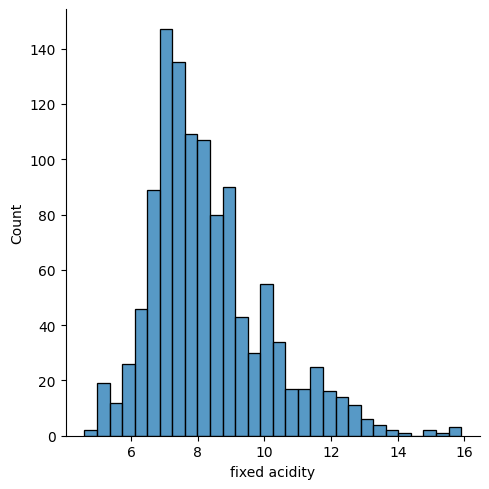

In [84]:
sns.displot(df['fixed acidity'])

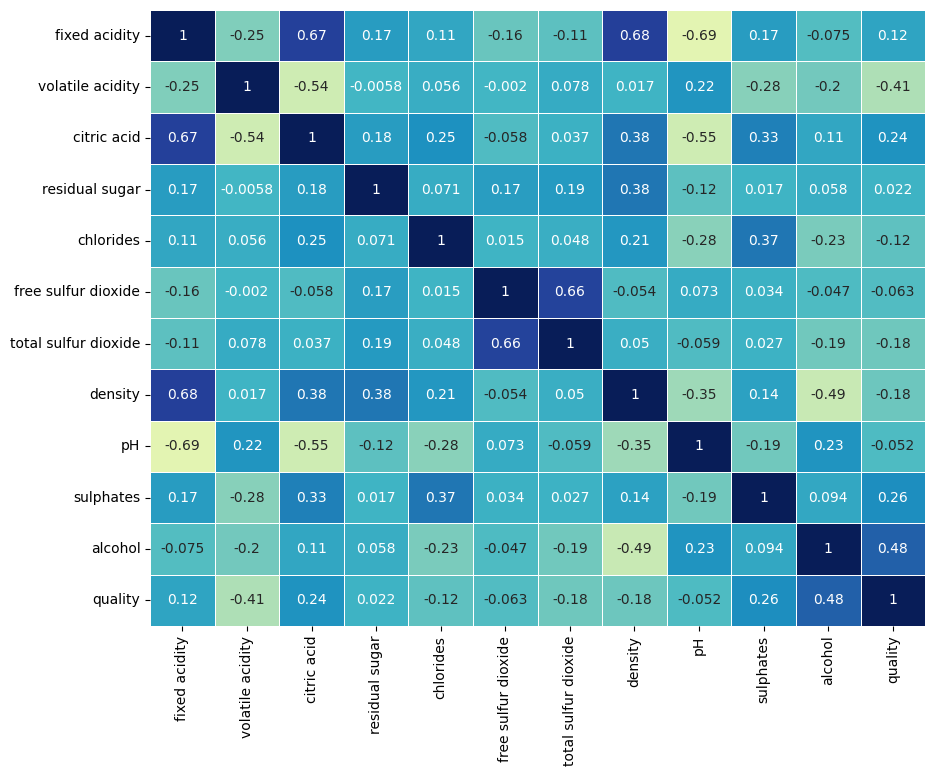

In [85]:
# Check the relationship between different variables using seaborn

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [86]:
#levels of Y variable

df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [87]:
# Combine 7&8 with 6 and combine 3&4 with 5 so that we have only 2 levels and a more balanced Y variable

df['quality'] = df['quality'].replace(8,6)
df['quality'] = df['quality'].replace(7,6)
df['quality'] = df['quality'].replace(3,5)
df['quality'] = df['quality'].replace(4,5)
df['quality'].value_counts()

6    621
5    522
Name: quality, dtype: int64

In [88]:
# Ssplitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df.drop('quality',axis=1), df['quality'], test_size=.25,
                                                   random_state=27)
X_train.shape,X_test.shape

((857, 11), (286, 11))

In [89]:
# Create the decision tree model using “entropy” method

model_1=DecisionTreeClassifier(criterion='entropy')

In [90]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [91]:
print('Train data accuracy')
print(model_1.score(X_train, y_train))
print('test data accuracy')
print(model_1.score(X_test, y_test))

Train data accuracy
1.0
test data accuracy
0.7132867132867133


In [92]:
y_pred = model_1.predict(X_test)

In [93]:
confusion_matrix(y_pred,y_test)

array([[ 85,  39],
       [ 43, 119]])

In [94]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

xvar = df.drop('quality', axis=1)
feature_cols = xvar.columns

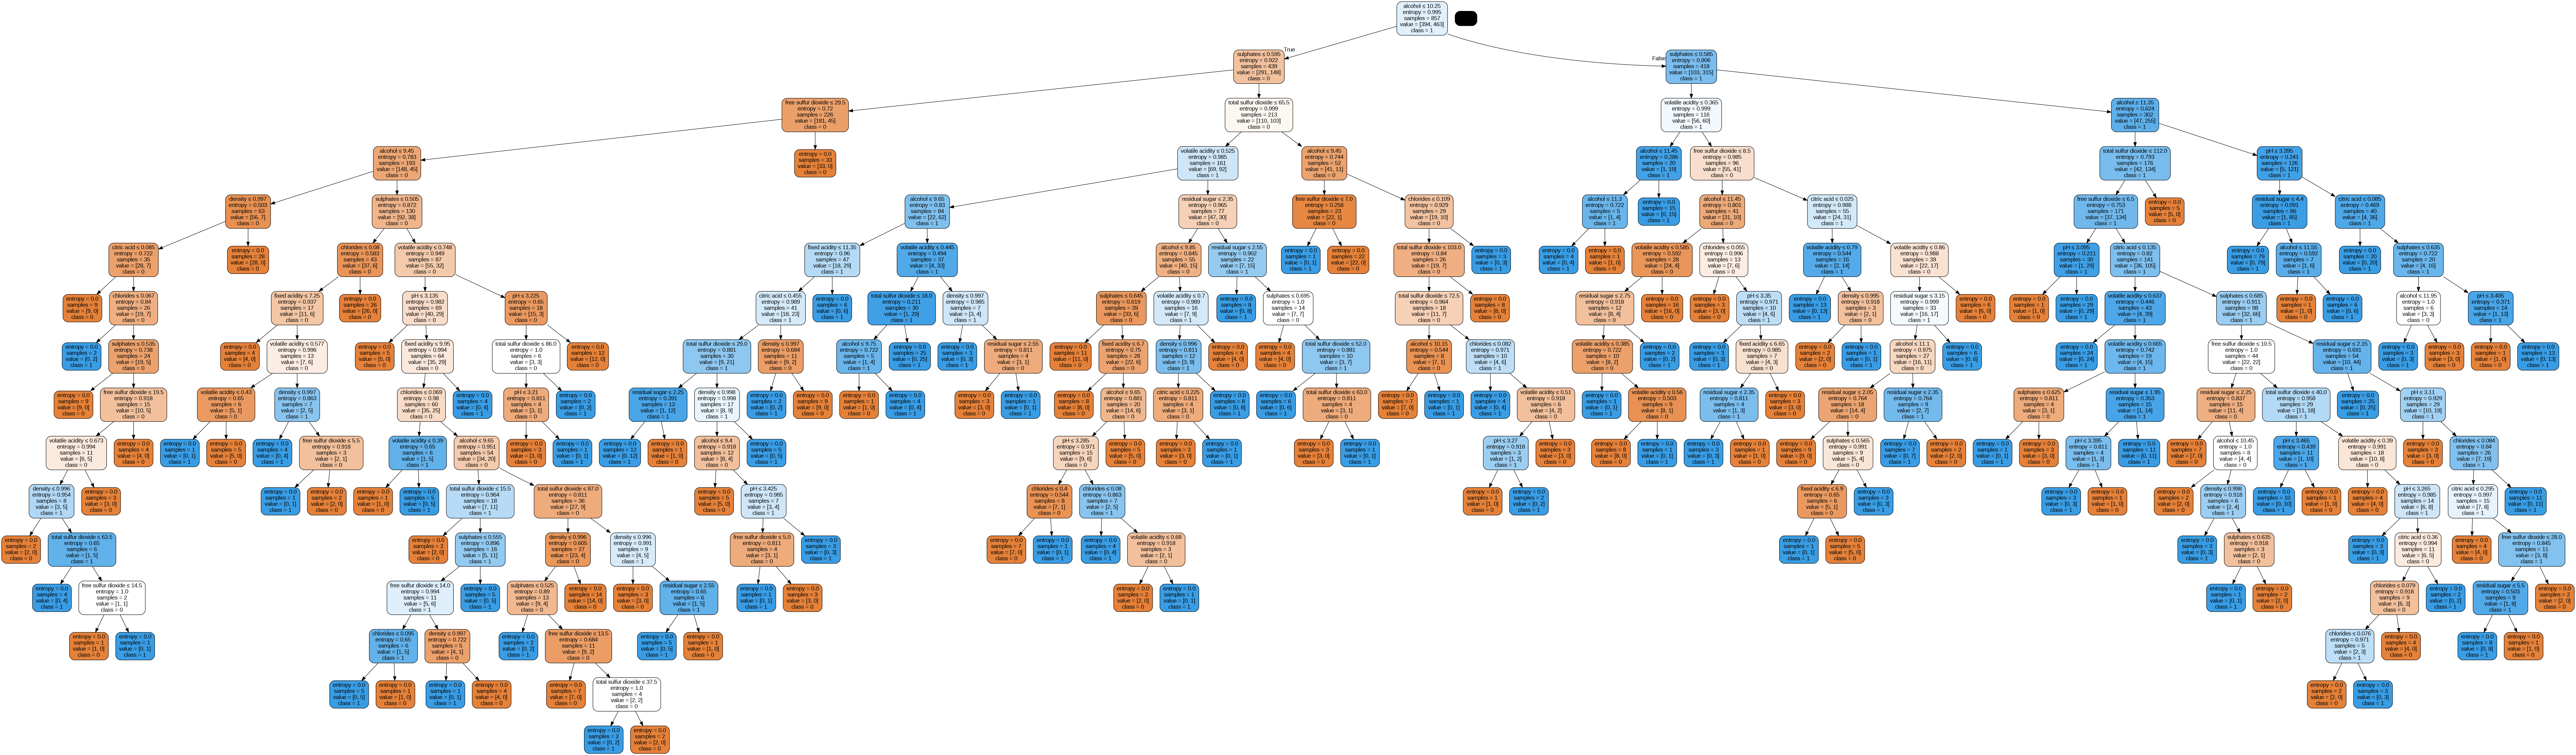

In [95]:
dot_data = StringIO()
export_graphviz(model_1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [96]:
# Create the decision tree model using "Gini" method

In [97]:
model_2= DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=15, max_leaf_nodes=10)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=10, random_state=100)

In [98]:
preds_pruned = model_2.predict(X_test)
preds_pruned_train = model_2.predict(X_train)

In [99]:
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))

0.7864644107351225
0.7097902097902098


In [100]:
model_2= DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=25, max_leaf_nodes=20)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=20, random_state=100)

In [101]:
preds_pruned = model_2.predict(X_test)
preds_pruned_train = model_2.predict(X_train)

In [102]:
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))

0.8261376896149358
0.7342657342657343


In [103]:
# Check confusion matrix classification report

print(confusion_matrix(preds_pruned,y_test))

[[ 94  42]
 [ 34 116]]


In [104]:
# Calculating feature importance

feat_importance = model_2.tree_.compute_feature_importances(normalize=False)
features=X_train.columns
feat_imp_dict = dict(zip(features, model_2.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
alcohol,0.460829
sulphates,0.183316
volatile acidity,0.094369
total sulfur dioxide,0.089711
pH,0.059405
residual sugar,0.048911
free sulfur dioxide,0.024673
citric acid,0.022477
chlorides,0.016309
fixed acidity,0.000000


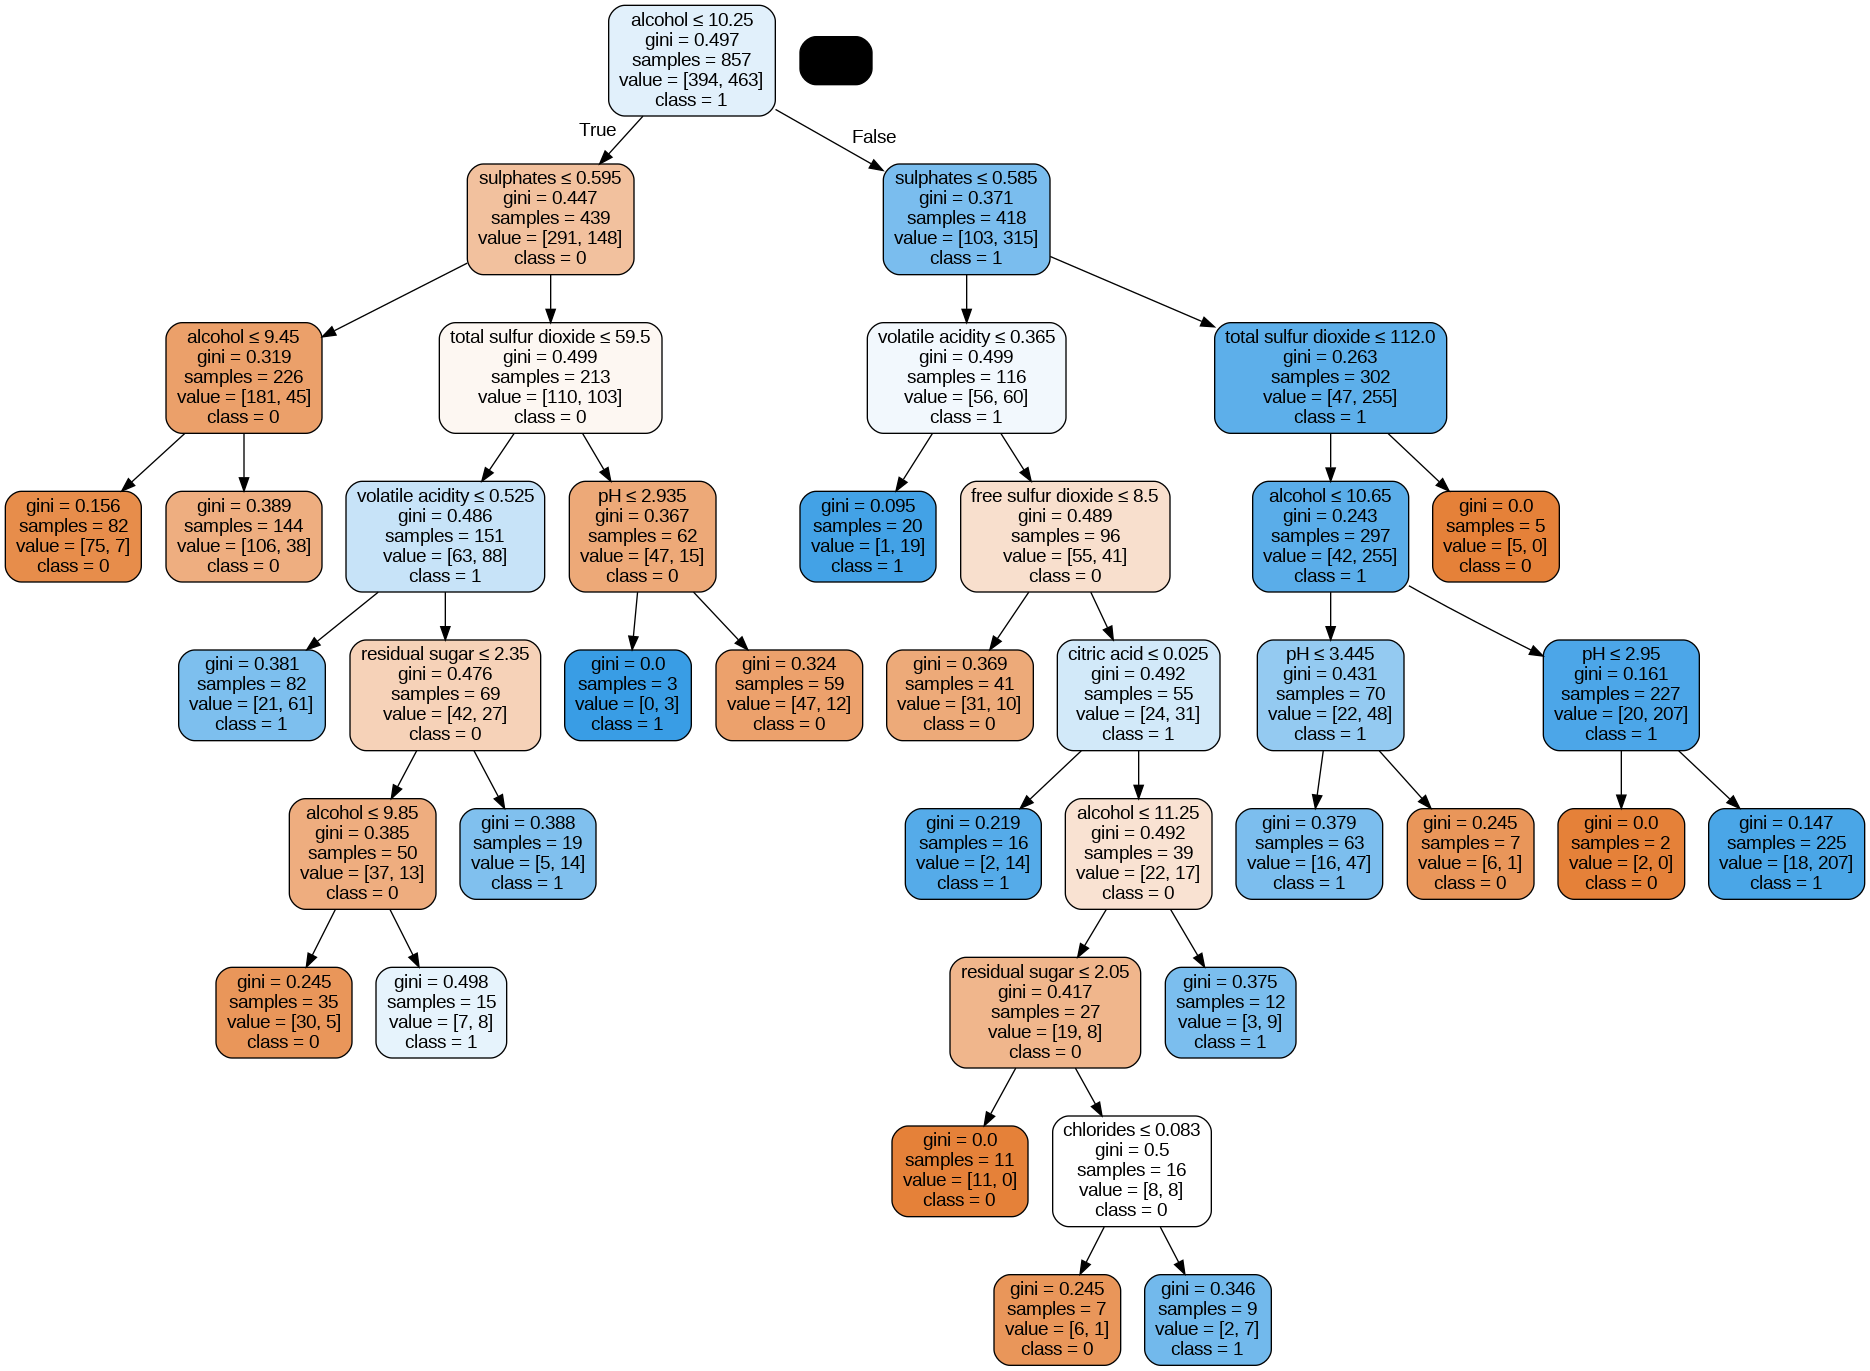

In [105]:
# Visualizing tree

dot_data = StringIO()
export_graphviz(model_2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wines_pruned_updated.png')
Image(graph.create_png())